In [1]:
# !pip install kmodes
# above needs to be run only once for installation
# it will stay available for subsequent sessions
# dont worry about rasa and skater errors , just in case they showup during installation


In [2]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [3]:
file=r'../data/bank-full.csv'

In [4]:
data=pd.read_csv(file,delimiter=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
cat_data=data.select_dtypes(['object']).drop(['y'],1)

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()

In [10]:
cat_data_encoded=cat_data.apply(lb.fit_transform)

In [11]:
cat_data_encoded.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


In [12]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    # another option for init="Huang"
    
    kmode.fit(cat_data_encoded)
    
    cost.append(kmode.cost_)
    
    print(num_clusters,':',cost[-1])
    
    

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 159248.0
1 : 159248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4801, cost: 132489.0
Run 1, iteration: 2/100, moves: 982, cost: 132489.0
2 : 132489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7324, cost: 124617.0
3 : 124617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7127, cost: 122274.0
Run 1, iteration: 2/100, moves: 457, cost: 122274.0
4 : 122274.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9407, cost: 116926.0
Run 1, iteration: 2/100, moves: 402, cost: 116926.0
5 : 116926.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9928,

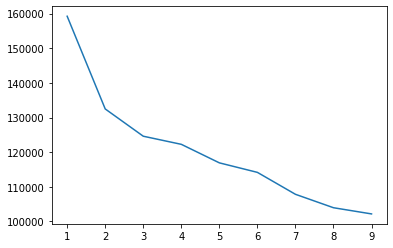

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [14]:
km = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(cat_data_encoded)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7324, cost: 124617.0


In [15]:
cat_data['cluster']=cluster_labels

In [16]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,cluster
0,management,married,tertiary,no,yes,no,unknown,may,unknown,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,1


In [17]:
cat_data['cluster'].value_counts()

0    27642
1    10388
2     7181
Name: cluster, dtype: int64

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='marital', ylabel='count'>

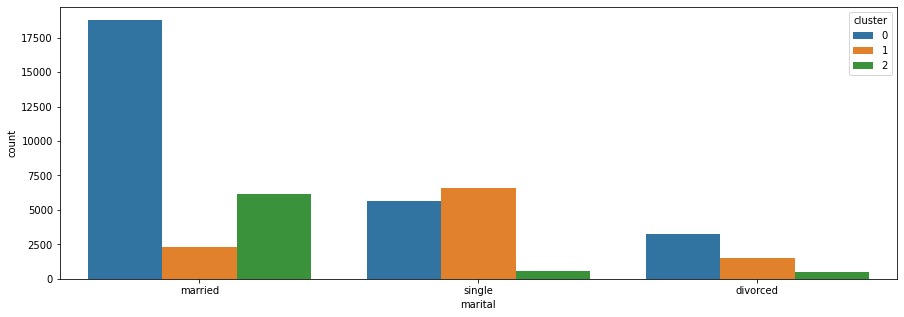

In [33]:
var='marital'
plt.subplots(figsize = (15,5))

sns.countplot(x=cat_data[var],
              order=cat_data[var].value_counts().index,
              hue=cat_data['cluster'])

<AxesSubplot:xlabel='housing', ylabel='count'>

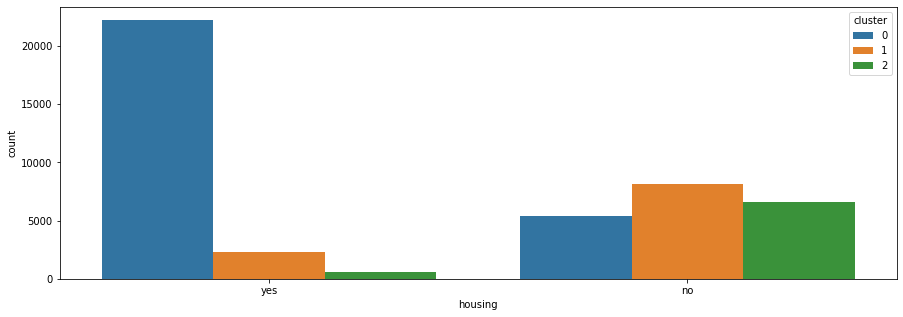

In [32]:
var='housing'
plt.subplots(figsize = (15,5))

sns.countplot(x=cat_data[var],
              order=cat_data[var].value_counts().index,
              hue=cat_data['cluster'])

<AxesSubplot:xlabel='job', ylabel='count'>

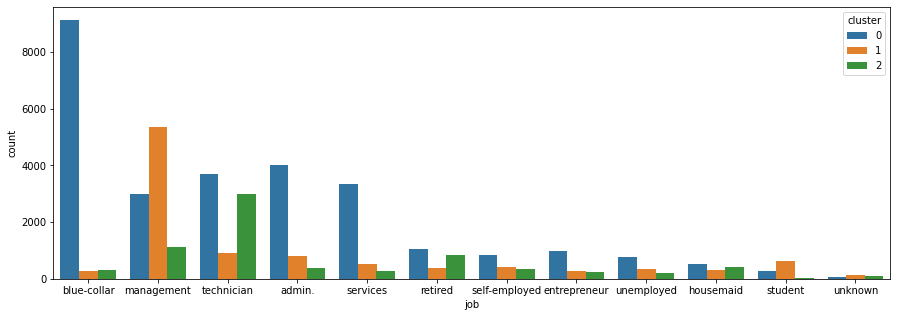

In [19]:
var='job'
plt.subplots(figsize = (15,5))

sns.countplot(x=cat_data[var],
              order=cat_data[var].value_counts().index,
              hue=cat_data['cluster'])

## Considering both numeric and categorical features together

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
mixed_data=data.drop(['y'],1)

C:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [22]:
mixed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [23]:
mixed_data_cats=[True if col in cat_data.columns else False for col in mixed_data.columns]



In [24]:
print(mixed_data_cats)

[False, True, True, True, True, False, True, True, True, False, True, False, False, False, False, True]


In [25]:
np.arange(mixed_data.shape[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [26]:
cat_col_indices=list(np.arange(mixed_data.shape[1])[mixed_data_cats])

In [27]:
cat_col_indices

[1, 2, 3, 4, 6, 7, 8, 10, 15]

In [28]:
mixed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [29]:
cost = []
for num_clusters in list(range(1,10)):
    
    kp = KPrototypes(n_clusters=num_clusters,n_init=1,verbose=1,max_iter=3)
    # i have set max_iter to a small value for saving time in class
    # default value is 100
    kp.fit(mixed_data,categorical=cat_col_indices)
    
    cost.append(kp.cost_)
    print(num_clusters,':',cost[-1])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 0, ncost: 422623278281.57196
1 : 422623278281.57196
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 630, ncost: 204120080178.07193
Run: 1, iteration: 2/3, moves: 387, ncost: 202661949474.64557
Run: 1, iteration: 3/3, moves: 230, ncost: 202070055238.7873
2 : 202070055238.7873
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 10840, ncost: 202096442544.63474
Run: 1, iteration: 2/3, moves: 8902, ncost: 166283947782.5394
Run: 1, iteration: 3/3, moves: 5320, ncost: 144017276860.1076
3 : 144017276860.1076
Initialization method and algori

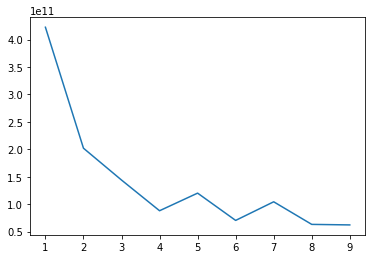

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [31]:
# for profiling mixed data clusters , you should analyse numeric and categorical 
# columns separately 



In [35]:
kp = KPrototypes(n_clusters=4,n_init=1,verbose=1,max_iter=3)
    # i have set max_iter to a small value for saving time in class
    # default value is 100
kp.fit(mixed_data,categorical=cat_col_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 8514, ncost: 181574873548.90332
Run: 1, iteration: 2/3, moves: 7196, ncost: 152673784299.87402
Run: 1, iteration: 3/3, moves: 6826, ncost: 133798095063.52254


KPrototypes(gamma=244.76622784759618, max_iter=3, n_clusters=4, n_init=1,
            verbose=1)

In [36]:
KP_cluster = kp.predict(mixed_data,categorical=cat_col_indices)
KP_cluster

array([2, 1, 1, ..., 2, 0, 2], dtype=uint16)

In [38]:
mixed_data['KP_Cluster'] = KP_cluster
mixed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,KP_Cluster
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


<AxesSubplot:xlabel='job', ylabel='count'>

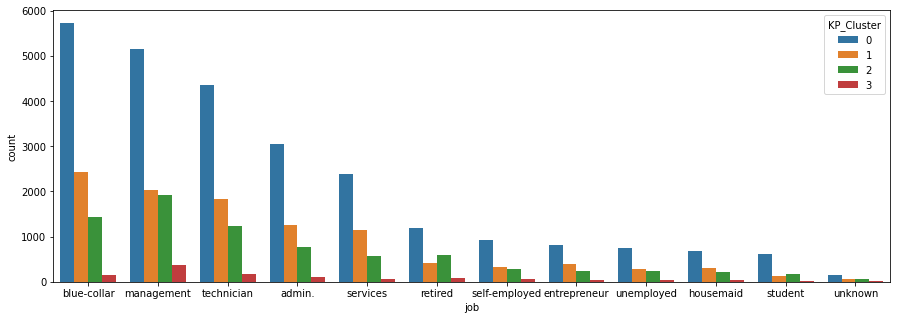

In [39]:
var='job'
plt.subplots(figsize = (15,5))

sns.countplot(x=mixed_data[var],
              order=mixed_data[var].value_counts().index,
              hue=mixed_data['KP_Cluster'])

In [34]:
## Please practice

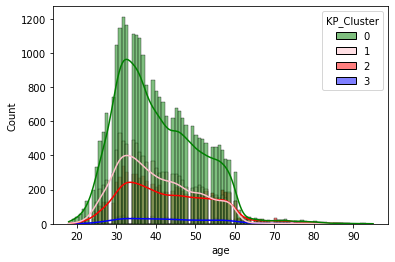

In [44]:
#create histogram to visualize distribution of points by team
sns.histplot(data=mixed_data, x='age', hue='KP_Cluster', palette=['green', 'pink', 'red','blue'], kde=True)
plt.show()